### *Importação das bibliotecas utilizadas*

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### **ATIVIDADE** 1
### Reescreva os algoritmos da semana anterior para imagens coloridas


#### **Atividade 1.1**
#### Carregar uma imagem e aplicar a equalização do histograma. Por fim, salvar a imagem resultante

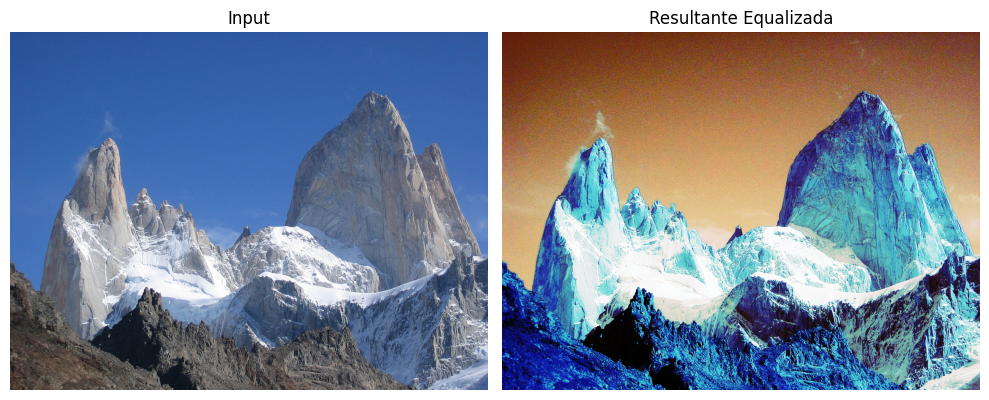

In [8]:
input_img = cv2.imread("input/ex1.jpg")

input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(input_img)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

equa_img = cv2.merge([r_eq, g_eq, b_eq])

equa_img_bgr = cv2.cvtColor(equa_img, cv2.COLOR_RGB2BGR)

cv2.imwrite('output/ex1_imagem_equalizada_colorida.jpg', equa_img_bgr)

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.title('Input')
plt.imshow(input_img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Resultante Equalizada')
plt.imshow(equa_img)
plt.axis('off')

plt.tight_layout()
plt.show()


#### **Atividade 1.2**
#### Utilizar uma imagem sub-exposta (subexposição) e aplique uma transformação de intensidade para aumentar o brilho, comparando a imagem de saída com a original (escrever uma análise sobre as diferenças)

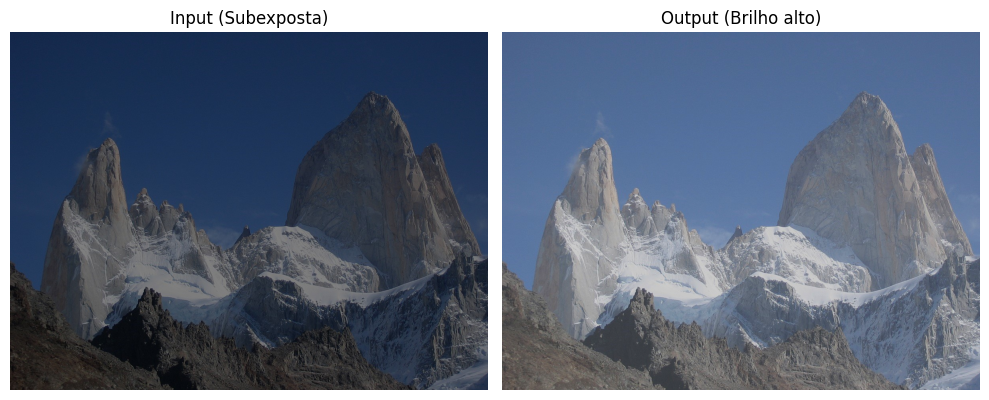

In [9]:
img_subexp = cv2.imread('input/ex2.jpg')

img_brilho = cv2.convertScaleAbs(img_subexp, alpha=1.2, beta=50)  # alpha = ganho, beta = brilho

cv2.imwrite('output/ex2.jpg', img_brilho)


#comparar
img_subexp = cv2.cvtColor(img_subexp, cv2.COLOR_BGR2RGB)
img_brilho = cv2.cvtColor(img_brilho, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input (Subexposta)")
plt.imshow(img_subexp, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Output (Brilho alto)")
plt.imshow(img_brilho, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


#### **Atividade 1.3**
#### Desenvolva um código que faça um ajuste de contraste de uma imagem utilizando uma função personalizada de sua autoria

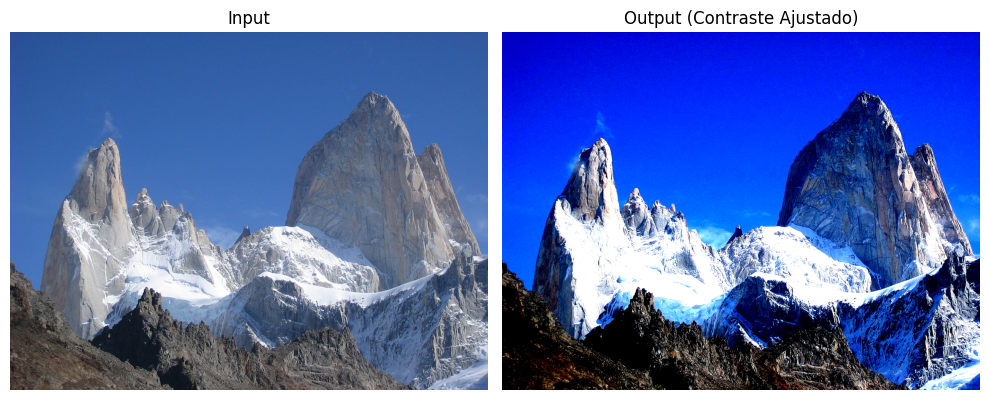

In [10]:
def ajuste_contraste(img, ft_ctrs):

    #Fator de contraste
    # = 1 sem alteração
    # >1 aumenta
    # <1 diminui
    
    
    img = img.astype(np.float32)
    
    img_contrastada = ft_ctrs * (img - 128) + 128  
    
    img_contrastada = np.clip(img_contrastada, 0, 255)
    
    return img_contrastada.astype(np.uint8)

img_in = cv2.imread('input/ex3.jpg')

fator_contraste = float(input("Insira o quanto deseja definir como contraste: "))  
img_out = ajuste_contraste(img_in, fator_contraste)

cv2.imwrite('output/ex3.jpg', img_out)

#comparar
img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(img_in, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Output (Contraste Ajustado)")
plt.imshow(img_out, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


#### **Atividade 1.4**
#### Aplique uma transformação logarítmica em uma imagem para ajustar sua intensidade e compare com a imagem original

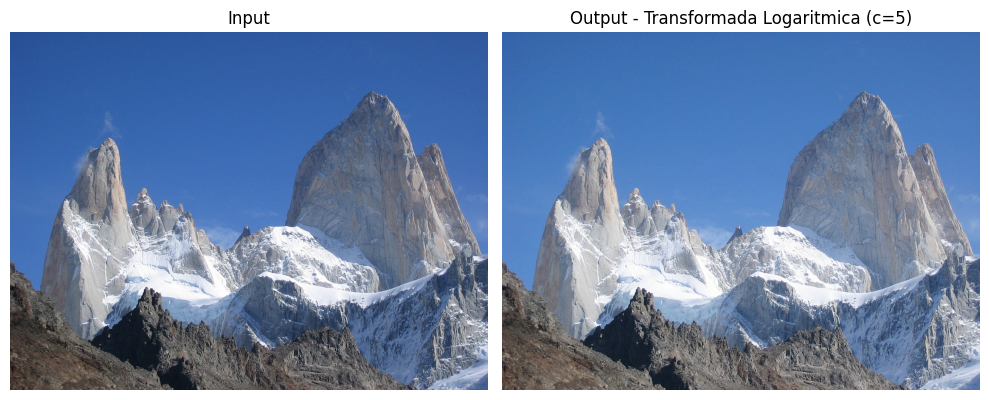

In [ ]:
def transformada_logaritmica(imagem, c):
    
    imagem_float = imagem.astype(np.float32)
    img_norm = imagem_float / 255.0
    
   
    imagem_log = c * np.log1p(img_norm)  # c*log(1 + r) 
    imagem_log = cv2.normalize(imagem_log, None, 0, 255, cv2.NORM_MINMAX)
    
    return imagem_log.astype(np.uint8)

img_in = cv2.imread('input/ex4.jpg')

constante_c = 5  
img_log = transformada_logaritmica(img_in, constante_c)
# cv2.imwrite('output/ex4.jpg', img_log)

# comparar o res vs input
img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
img_log = cv2.cvtColor(img_log, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(img_in, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Output - Transformada Logaritmica (c={constante_c})")
plt.imshow(img_log, cmap='gray')
plt.axis('off')


plt.tight_layout()
plt.show()


#### **Atividade 1.5**
#### Crie uma função que normalize os níveis de intensidade de uma imagem para o intervalo de 0 a 255 (intervalo fechado [0, 255]) e faça testes com diferentes imagens

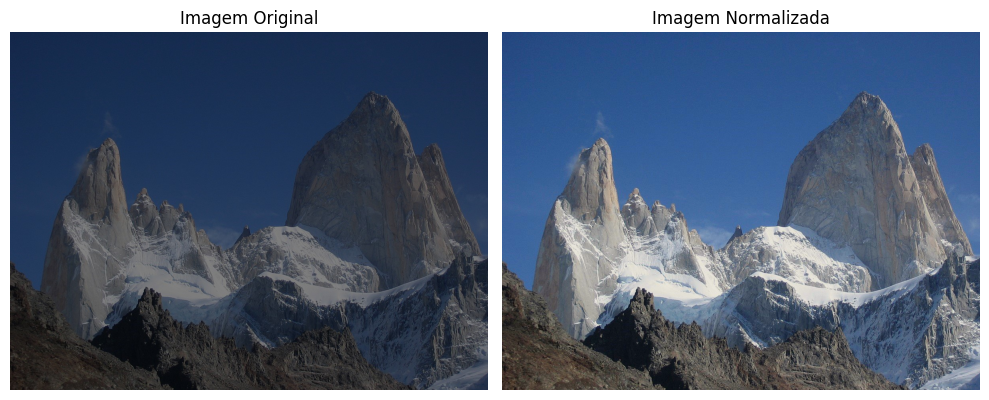

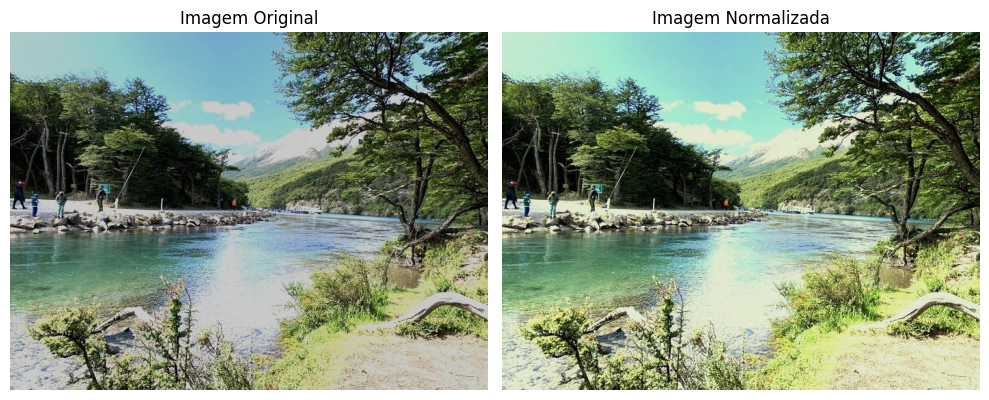

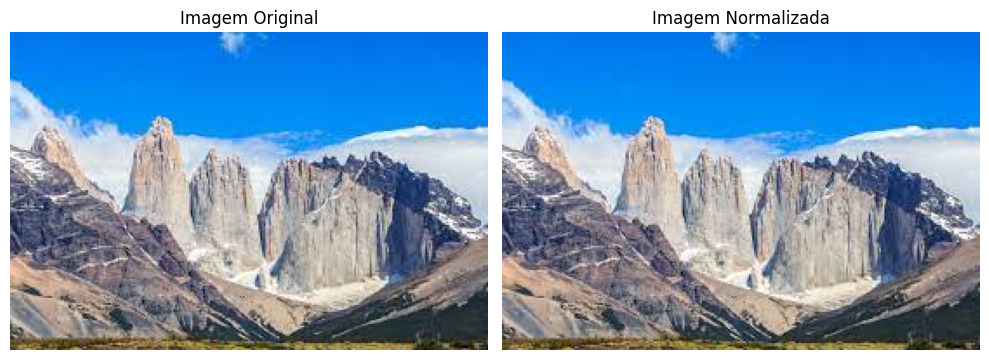

In [12]:
#img_norm= (max−min/imagem−min) ×255
def norm_img(img):

    canais = cv2.split(img)
    canais_norm = []
    
    for canal in canais:
        min_val = np.min(canal)
        max_val = np.max(canal)
        canal_norm = ((canal - min_val) / (max_val - min_val)) * 255
        canal_norm = np.uint8(canal_norm)
        canais_norm.append(canal_norm)
    return  cv2.merge(canais_norm)


imgs = ['input/ex5_0.jpg', 'input/ex5_1.jpg', 'input/ex5_2.jpg']

for img in imgs:
    imagem = cv2.imread(img)
    img_norm = norm_img(imagem)

    # cv2.imwrite(f'output/ex5_normalizada_{img}', img_norm)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    img_norm = cv2.cvtColor(img_norm, cv2.COLOR_BGR2RGB)



    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Imagem Original")
    plt.imshow(imagem, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Imagem Normalizada")
    plt.imshow(img_norm, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


#### **Atividade 1.6**
#### Escrever um algoritmo/código que aplique um filtro da média em uma imagem

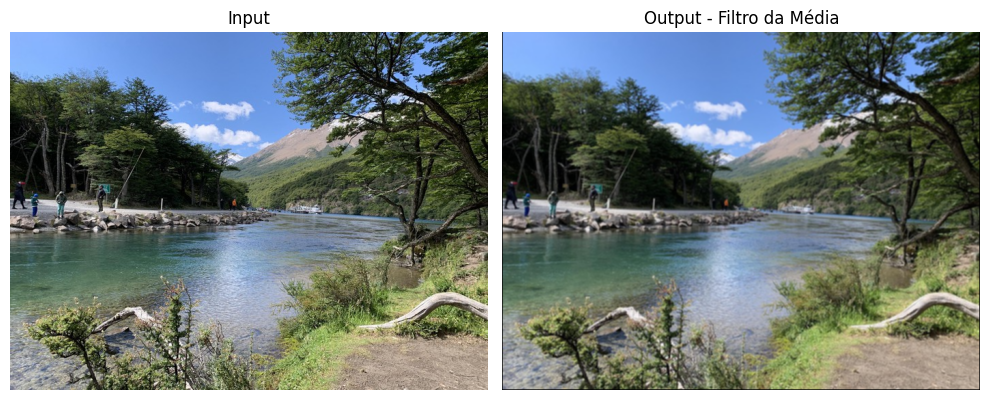

In [13]:
def aplicar_filtro_media(imagem, tamanho_kernel):
    assert tamanho_kernel % 2 == 1, "O tamanho do kernel deve ser ímpar."
    
   
    imagem_array = np.array(imagem)
    altura, largura, canais = imagem_array.shape
    
    deslocamento = tamanho_kernel // 2
    
    imagem_filtrada = np.zeros_like(imagem_array)
    
    for i in range(deslocamento, altura - deslocamento):
        for j in range(deslocamento, largura - deslocamento):
            for c in range(canais):
                regiao = imagem_array[i - deslocamento:i + deslocamento + 1, j - deslocamento:j + deslocamento + 1, c]
                media = np.sum(regiao) // (tamanho_kernel * tamanho_kernel)
                imagem_filtrada[i, j, c] = media
    
    return Image.fromarray(imagem_filtrada)

imagem = Image.open('input/ex6.jpg')

img_media = aplicar_filtro_media(imagem, 3)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(imagem)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Output - Filtro da Média")
plt.imshow(img_media)
plt.axis('off')

plt.tight_layout()
plt.show()


#### **Atividade 1.7**
#### Implementar um algoritmo que aplique o filtro da mediana em uma imagem

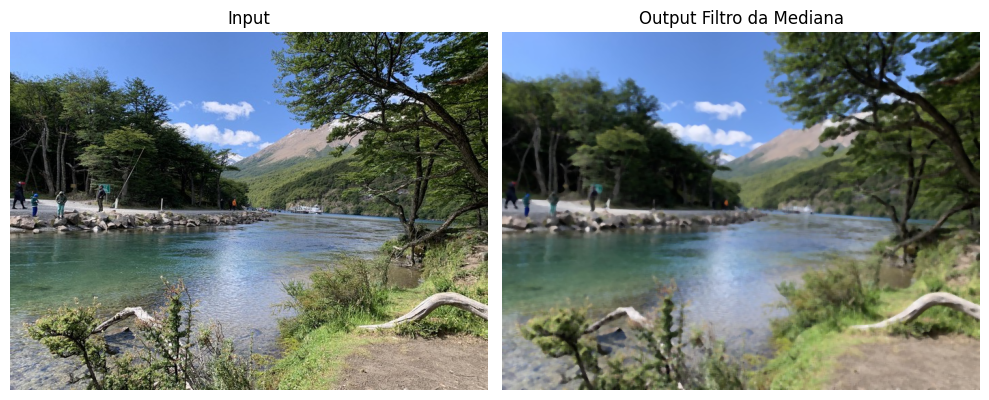

In [15]:
imagem = cv2.imread('input/ex7.jpg')

imagem_filtrada_mediana = cv2.medianBlur(imagem, 5)

imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_filtrada_mediana_rgb = cv2.cvtColor(imagem_filtrada_mediana, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(imagem_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Output Filtro da Mediana")
plt.imshow(imagem_filtrada_mediana_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()


#### **Atividade 1.9**
#### Escreva um algoritmo que aplique o filtro de realce em imagens naturais (fotos de ambientes)

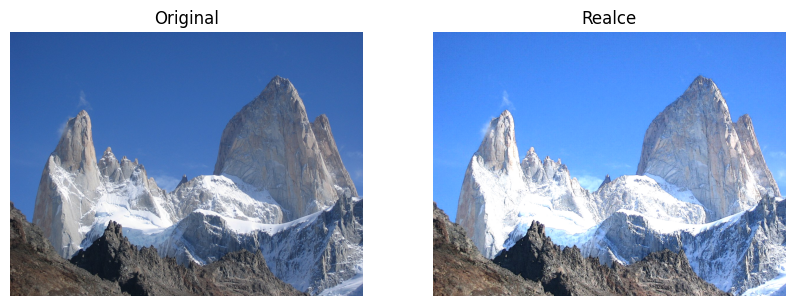

In [2]:
def realce_img(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Erro ao carregar a imagem.")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    edges = cv2.Laplacian(gray, cv2.CV_64F)
    edges = np.uint8(np.absolute(edges))
    
    image_float = np.float32(image)
    edges_float = np.float32(cv2.merge([edges, edges, edges]))
    
    enhanced = cv2.addWeighted(image_float, 1.5, edges_float, -0.5, 0, dtype=cv2.CV_32F)
    enhanced = np.clip(enhanced, 0, 255)  
    enhanced = np.uint8(enhanced)
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    enhanced_rgb = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image_rgb)
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.imshow(enhanced_rgb)
    plt.title("Realce")
    plt.axis("off")
    
    plt.show()

image_path = "input/ex9.jpg"  
realce_img(image_path)


## **ATIVIDADE** 2
## Escreva um algoritmo que conte a quantidade de cores em uma imagem

In [16]:
def contar_cores(input_img):
    
    imagem = Image.open(input_img)

    imagem_rgb = imagem.convert('RGB')
    pixels = imagem_rgb.getdata()
    cores_unicas = set(pixels)

    return len(cores_unicas)


input_img = "input/ex2.jpg"  
nu_cores = contar_cores(input_img)
print(f"Total de cores = {nu_cores}")

Total de cores = 16539


### **ATIVIDADE** 3
### Escreva um algoritmo que retorne se uma imagem é classificada como fria ou quente


In [18]:
def classificar_imagem(input_img):
    imagem = Image.open(input_img)
    imagem_rgb = imagem.convert('RGB')
    pixels = np.array(imagem_rgb)

    media_r = np.mean(pixels[:, :, 0])
    media_g = np.mean(pixels[:, :, 1])
    media_b = np.mean(pixels[:, :, 2]) 

    if media_r > media_b and media_r > media_g:
        return "Quente"
    elif media_b > media_r and media_b > media_g:
        return "Fria"
    else:
        return "Neutra"

input_img = "input/ex3.jpg" 
res_class = classificar_imagem(input_img)
print(f"A imagem é classificada como: {res_class}")


A imagem é classificada como: Fria


### **ATIVIDADE** 4
### Escreva um algoritmo que avalie se uma imagem é colorida ou nível de cinza

In [4]:
def verificar_imagem(input_img):
    imagem = Image.open(input_img)
    imagem_rgb = imagem.convert('RGB')
    pixels = np.array(imagem_rgb)

    pixels_nivel_de_cinza = 0
    total_pixels = pixels.shape[0] * pixels.shape[1]

    for pixel in pixels.reshape(-1, 3):
        if pixel[0] == pixel[1] == pixel[2]:
            pixels_nivel_de_cinza += 1

    porcentagem_cinza = (pixels_nivel_de_cinza / total_pixels) * 100

    if porcentagem_cinza > 90:
        return "Nível de Cinza"
    else:
        return "Colorida"

input_img ="input/ex4.jpg" 
resultado = verificar_imagem(input_img)
print(f"A imagem é classificada como: {resultado}")


A imagem é classificada como: Colorida
